<a href="https://colab.research.google.com/github/Dhanasree-Rajamani/Machine_learning_Assignments/blob/main/Assignment3_Fractal_cluster/ML_Food_Sustainability_fractal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Impact of Food Production on Environment 

The following cells consists of:

Exploratory Data Analysis

Data cleaning

Data processing 

Data Imputation

One hot encoding and Scaling

Fractal clustering 

Objective Functions:

- Determining the cluster with the least emission for "total emission" feature, inorder to promote these food products and increase their production 

- Determining the cluster with the highest emission based on overall emission - which is total emission plus the eutrophication and other emissions caused, inorder to decrease their production or find more environmental-friendly techniques for production  


Import statements

In [78]:
!pip install IPython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown
from IPython.display import clear_output

In [80]:
food_prod = pd.read_csv('https://raw.githubusercontent.com/Dhanasree-Rajamani/Machine_learning_Assignments/main/dataset/Food_Production.csv')

In [81]:
fao = pd.read_csv('https://raw.githubusercontent.com/Dhanasree-Rajamani/Machine_learning_Assignments/main/dataset/FAO.csv',  encoding = 'ISO-8859-1')

Food product and various emissions caused

The food production dataset consists of various food products and various emissions caused by them - such as land usage, water usage, packaging and transport emission, eutrophication etc. These variables can be used to determine how the production of these products affects the environment inorder to determine which production can be increased or decreased - for sustainable food and thereby, a better Earth  

In [82]:
food_prod.head(5)

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


This dataset consists of countries producing various Food/Feed products from 1961 to 2013, which can be used to determine which countries produce the most and least of which kind of food product. This can be used to promote and produce more food products which cause less emission - through various measures. 

In [83]:
fao.head(5)

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [84]:
fao.drop(columns=["Area Abbreviation","Area Code","Item Code","Element Code","latitude","longitude"], inplace=True)

Here, taking the food items dataset(We've split the datasets between us in the team)

In [85]:
food_prod.dtypes

Food product                                                                object
Land use change                                                            float64
Animal Feed                                                                float64
Farm                                                                       float64
Processing                                                                 float64
Transport                                                                  float64
Packging                                                                   float64
Retail                                                                     float64
Total_emissions                                                            float64
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   float64
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                   float64
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      float64
Fres

In [86]:
cat_cols = food_prod.select_dtypes(["object"]).columns
print("Count of categorical variables is",cat_cols.value_counts().sum())
num_cols = food_prod.select_dtypes(["float64","int64"]).columns
print("Count of numerical variables is",num_cols.value_counts().sum())

Count of categorical variables is 1
Count of numerical variables is 22


For understanding the dataset, taking the columns that contribute to total_emission feature 

In [87]:
fp_subset = food_prod[['Food product',	'Land use change',	'Animal Feed',	'Farm', 'Processing',	'Transport',	'Packging',	'Retail']]

In [88]:
df_grouped = fp_subset.groupby('Food product').sum()[['Land use change',	'Animal Feed',	'Farm', 'Processing',	'Transport',	'Packging',	'Retail']]
df_grouped

,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail
Food product,,,,,,,
Apples,0.0,0.0,0.2,0.0,0.1,0.0,0.0
Bananas,0.0,0.0,0.3,0.1,0.3,0.1,0.0
Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3
Beef (beef herd),16.3,1.9,39.4,1.3,0.3,0.2,0.2
Beef (dairy herd),0.9,2.5,15.7,1.1,0.4,0.3,0.2
Beet Sugar,0.0,0.0,0.5,0.2,0.6,0.1,0.0
Berries & Grapes,0.0,0.0,0.7,0.0,0.2,0.2,0.0
Brassicas,0.0,0.0,0.3,0.0,0.1,0.0,0.0
Cane Sugar,1.2,0.0,0.5,0.0,0.8,0.1,0.0


Visualization of various emissions caused by all food products

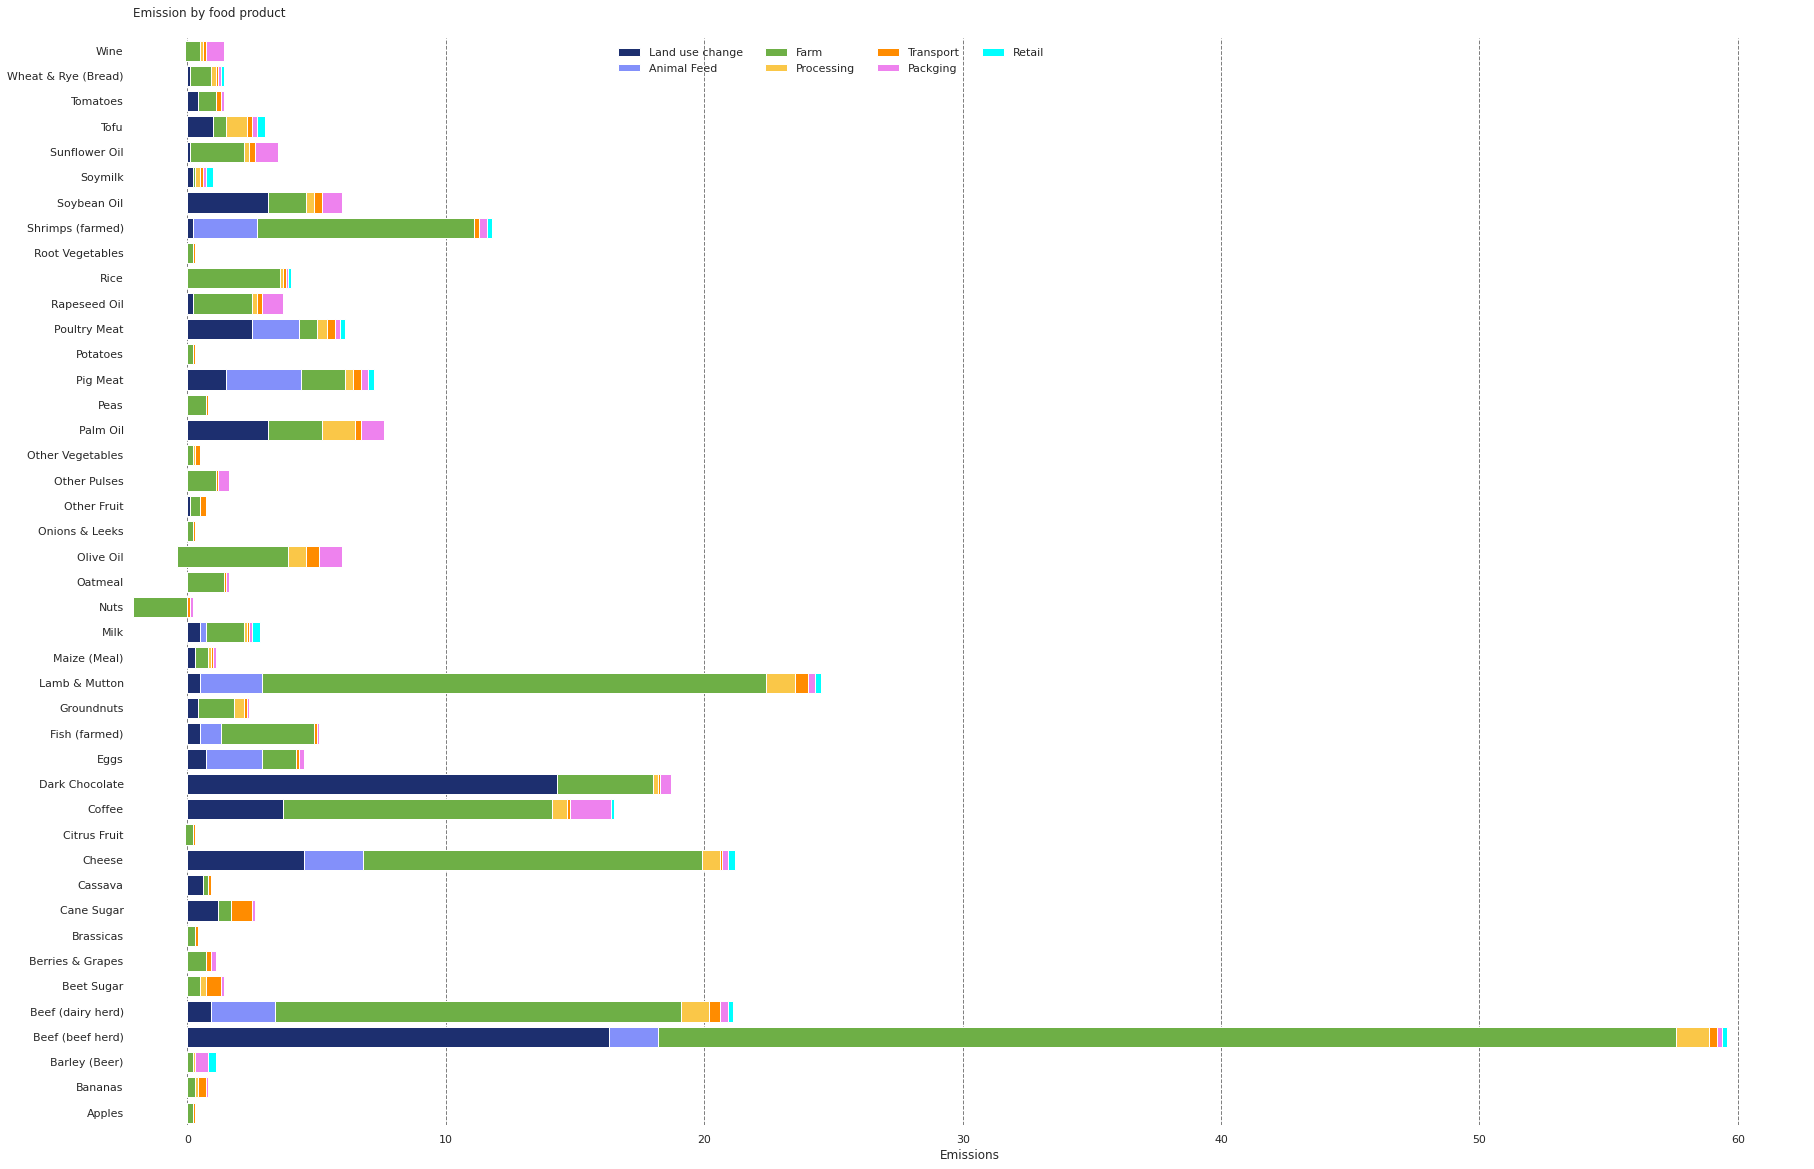

In [89]:
fields = ['Land use change',	'Animal Feed',	'Farm', 'Processing',	'Transport',	'Packging',	'Retail']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748', "#FF8C00", "#EE82EE", "#00FFFF", "#FF4500"]
labels = ['Land use change',	'Animal Feed',	'Farm', 'Processing',	'Transport',	'Packging',	'Retail']
# figure and axis
fig, ax = plt.subplots(1, figsize=(30, 20))
# plot bars
left = len(df_grouped) * [0]
for idx, name in enumerate(fields):
    plt.barh(df_grouped.index, df_grouped[name], left = left, color=colors[idx])
    left = left + df_grouped[name]
# title, legend, labels
plt.title('Emission by food product\n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Emissions')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

This dataframe contains total_emissions which is a sum of the first 7 columns, and the other emission columns in units of emissions per 1000kcal

In [90]:
df_food = food_prod[['Total_emissions','Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)','Freshwater withdrawals per 1000kcal (liters per 1000kcal)','Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)','Land use per 1000kcal (m² per 1000kcal)','Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)']]

In [91]:
#df_food = df_food.replace(np.nan, 0)
df_food=df_food.dropna(axis=0)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



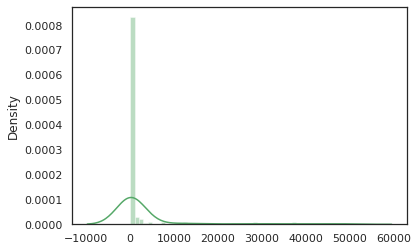

In [92]:
import numpy as np
import seaborn as sns

sns.set( style = "white" )
      
sns.distplot(df_food, kde = True, color = "g")

Scaling the data

In [93]:
#scaler=StandardScaler()
#scaler.fit(df_food)
df_food = np.log(df_food)

In [94]:
#df_food_=scaler.transform(df_food)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



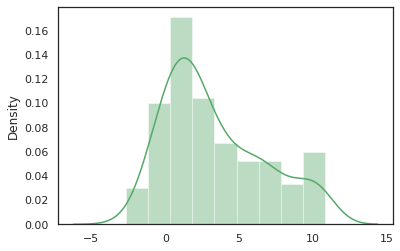

In [95]:
import numpy as np
import seaborn as sns


sns.set( style = "white" )
      
sns.distplot(df_food, kde = True, color = "g")

In [96]:
#'Total_emissions',	'Land use change',	'Animal Feed',	'Farm', 'Processing',	'Transport',	'Packging',	'Retail', 'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
#'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',                  
#'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',               
#'Land use per 1000kcal (m² per 1000kcal)',                                    
#'Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)'

In [97]:
df_temp = pd.DataFrame(df_food, columns = ['Total_emissions',	'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)', 'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)', 'Land use per 1000kcal (m² per 1000kcal)', 'Freshwater withdrawals per 1000kcal (liters per 1000kcal)','Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)' ])

In [98]:
df_temp = df_temp.join(food_prod['Food product'])

In [99]:
df_food = df_temp

Interactive visual where we can choose the type of food product in the drop down and the graph comes up displaying the various kinds and levels of emission caused by the chosen food product  

Dropdown(index=20, options=('Oatmeal', 'Rice', 'Potatoes', 'Cane Sugar', 'Beet Sugar', 'Nuts', 'Groundnuts', '…

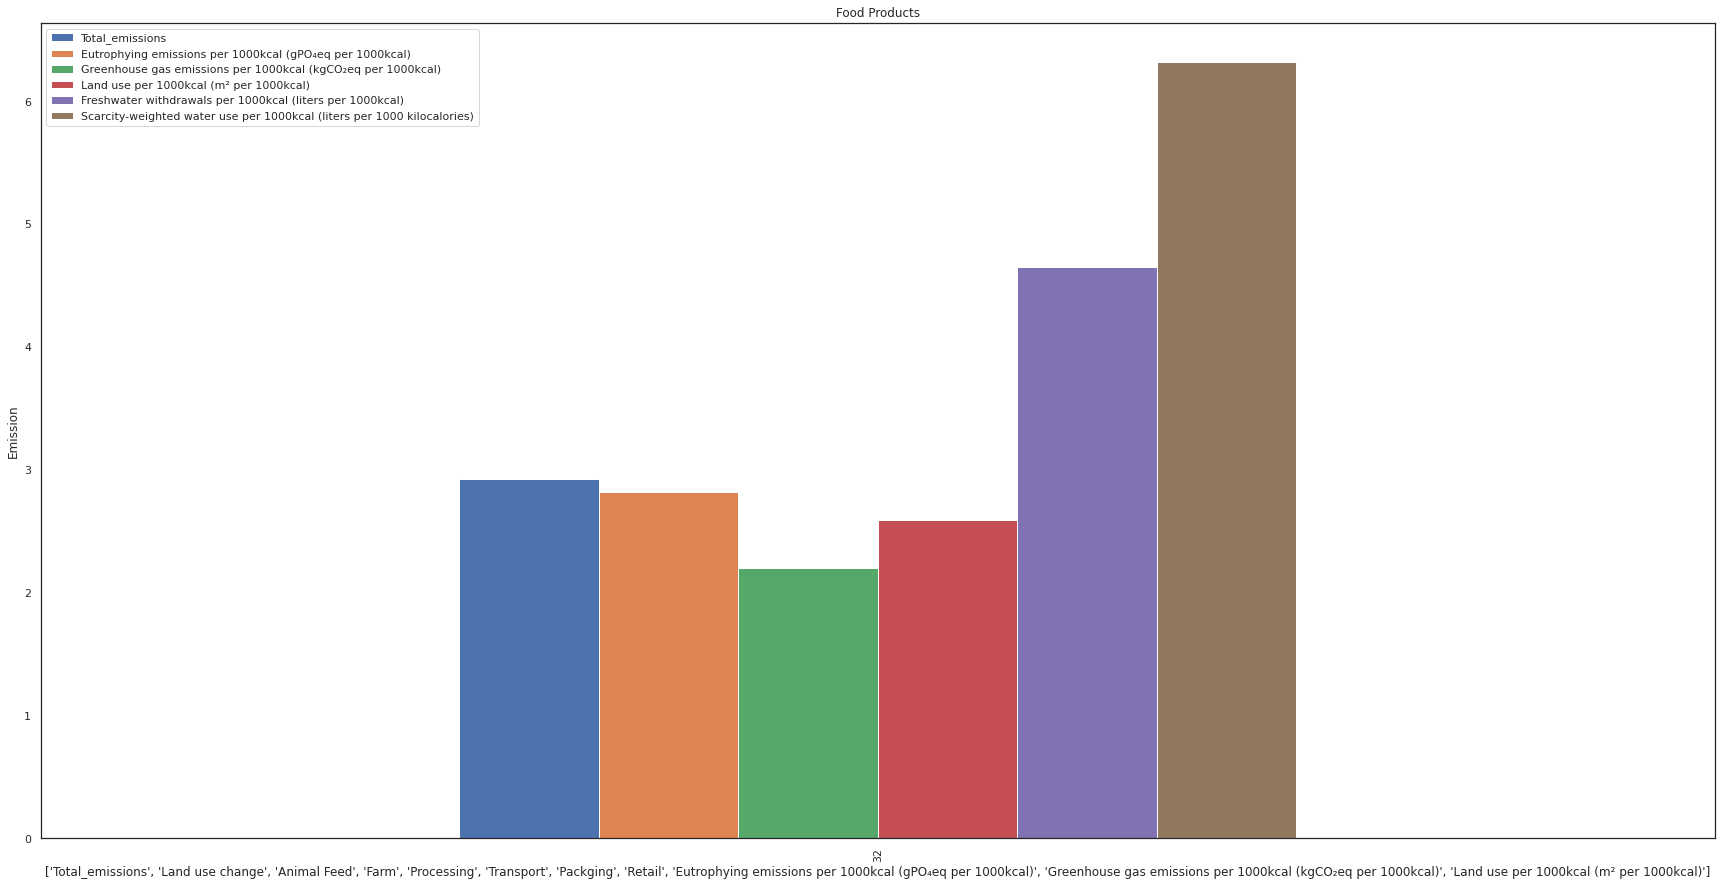

In [100]:
# Define the function to create the bar chart
def plot_food_features(food):
    # Filter the dataframe to get only the rows with the selected food value
    food_data = df_food[df_food['Food product'] == food]
    # Create a bar chart of the filtered data
    # Set plot title and axis labels
    #plt.clf()
    food_data.plot(kind='bar', figsize=(30, 15))
    # Set plot title and axis labels
    plt.title('Food Products')
    plt.xlabel(['Total_emissions', 'Land use change',	'Animal Feed',	'Farm', 'Processing',	'Transport',	'Packging',	'Retail', 'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',               
'Land use per 1000kcal (m² per 1000kcal)'])
    plt.ylabel("Emission")
    # Show the plot
    plt.show()

# Create a dropdown menu with the list of food values from the dataframe
food_dropdown = Dropdown(options=df_food['Food product'].unique())

# Create a callback function for the dropdown menu
def on_food_change(change):
    # Get the selected food value
    food = change.new
    clear_output()
    display(food_dropdown)
    # Call the plot_food_features function with the selected food value
    plot_food_features(food)

# Set the callback function for the dropdown menu
food_dropdown.observe(on_food_change, names='value')

# Display the dropdown menu
display(food_dropdown)


Top 10 products contributing to Retail emission

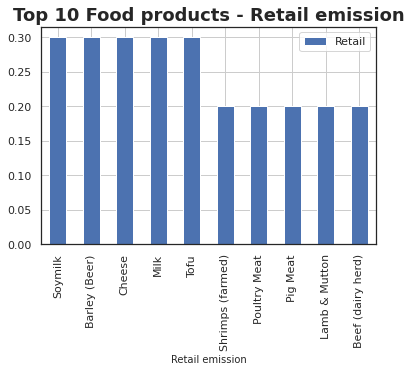

In [101]:
food_prod_sorted = food_prod.sort_values(by = 'Retail', ascending=False).head(10)

food_prod_sorted.plot(x = "Food product", y = "Retail", kind = "bar")

plt.title("Top 10 Food products - Retail emission",fontsize = 18, fontweight = "bold")
plt.xlabel("Retail emission",fontsize = 10)
plt.ylabel("")
plt.grid(True)
plt.show()

Treemap denoting the land use emission of each food product

In [102]:
fig = px.treemap(food_prod, path=['Food product'],
                 values='Land use per kilogram (m² per kilogram)',
                 color='Land use per kilogram (m² per kilogram)' )
fig.update_traces(textinfo="label + value")
fig.show()

Top 10 products by Transport emission

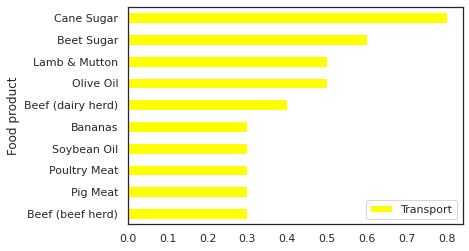

In [103]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

food_prod_sorted = food_prod.sort_values(by = 'Transport').tail(10)

food_prod_sorted.plot(x = "Food product", y = "Transport", kind = "barh", color= "yellow")

Top 10 products contributing to Package emission

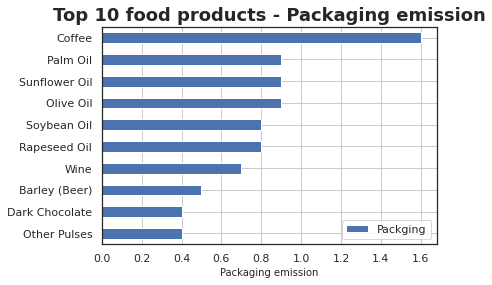

In [104]:
food_prod_sorted = food_prod.sort_values(by = 'Packging').tail(10)

food_prod_sorted.plot(x = "Food product", y = "Packging", kind = "barh")

plt.title("Top 10 food products - Packaging emission",fontsize = 18, fontweight = "bold")
plt.xlabel("Packaging emission",fontsize = 10)
plt.ylabel("")
plt.grid(True)
plt.show()

In [105]:
df_food_fr = df_food[['Food product', 'Total_emissions','Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)','Freshwater withdrawals per 1000kcal (liters per 1000kcal)','Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)','Land use per 1000kcal (m² per 1000kcal)','Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)']]

In [106]:
df_food_fr['sum_emission'] = df_food_fr['Total_emissions'] + df_food_fr['Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)'] + df_food_fr['Freshwater withdrawals per 1000kcal (liters per 1000kcal)'] +df_food_fr['Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)'] + df_food_fr['Land use per 1000kcal (m² per 1000kcal)'] + df_food_fr['Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)']

<ipython-input-106-557b03e74544>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [107]:
test_data = df_food_fr[['Total_emissions', 'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)', 'Freshwater withdrawals per 1000kcal (liters per 1000kcal)', 'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)', 'Land use per 1000kcal (m² per 1000kcal)', 'Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)', 'sum_emission']]

Visualization to view food products and their overall emission

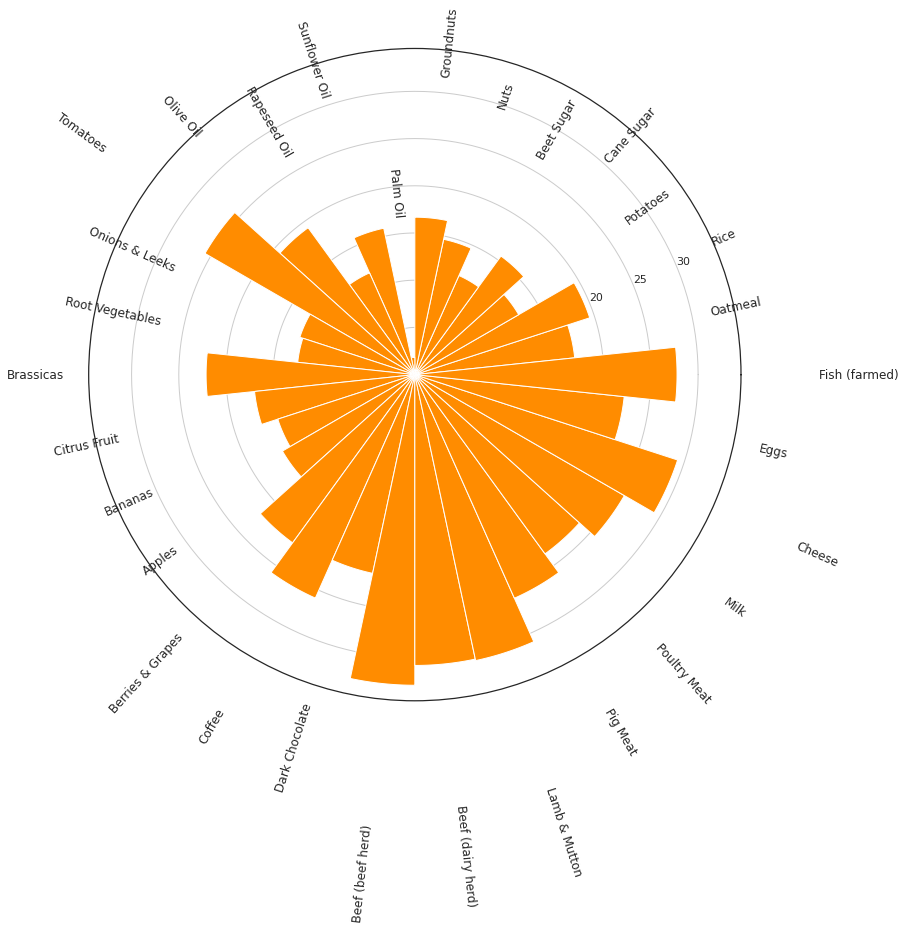

In [108]:
plt.figure(figsize=(12,12))
ax = plt.subplot(111, polar=True)
plt.axis()

#set min and max value
lowerLimit = 0
max_v = df_food_fr['sum_emission'].max()

#set heights and width
heights = df_food_fr['sum_emission']
width = 2*np.pi / len(df_food_fr.index)

#set index and angle
indexes = list(range(1, len(df_food_fr.index)+1))
angles = [element * width for element in indexes]

bars = ax.bar(x=angles, height=heights, width=width, bottom=lowerLimit,
              linewidth=1, edgecolor="white", color="#FF8C00")
labelPadding = 15

for bar, angle, height, label in zip(bars,angles, heights, df_food_fr['Food product']):
    rotation = np.rad2deg(angle)
    alignment = ""
    #deal with alignment
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    ax.text(x=angle, y=lowerLimit + bar.get_height() + labelPadding,
            s=label, ha=alignment, va='center', rotation=rotation, 
            rotation_mode="anchor")
    ax.set_thetagrids([], labels=[])
plt.show()

In [109]:
fp_emission_total = food_prod[['Food product',	'Total_emissions']]

###Fractal clustering - objective function - determining the cluster with the least emission for "total emission" feature, inorder to promote these food products and increase their production 

Calculating: Sum of Square errors within clusters and Silhouette score

In [110]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn import metrics

In [111]:
def plot_cluster(df, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    
    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    
    sse_within_cluster = {}
    silhouette_score = {}
    
    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
        #, n_jobs=-1)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)


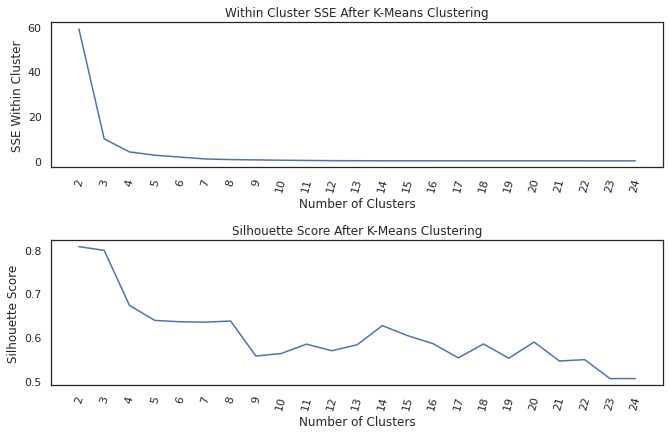

In [112]:
plot_cluster(fp_emission_total, max_loop=25)

First trial of clustering

In [113]:
def apply_cluster(df, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10) #, n_jobs=-1)  
    kmeans.fit(X_rb) 
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_
    
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score))
    print("sse within cluster: " + str(sse_within_cluster))
    
    return df

In [114]:
cluster_food_prod = apply_cluster(fp_emission_total, clusters=7)

clustering performance
-----------------------------------
silhouette score: 0.6341744049793245
sse within cluster: 0.8544417689954498


<ipython-input-113-125c197b8701>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [115]:
  cluster_df = (
    cluster_food_prod
    .groupby('cluster')
    .agg({"Total_emissions":"mean", "Food product":"count"})
    .sort_values('Total_emissions')
    .reset_index()
)

cluster_df

,cluster,Total_emissions,Food product
0,0,0.859091,22
1,5,3.312500,8
2,3,6.333333,6
3,4,11.800000,1
4,6,17.600000,2
5,2,22.266667,3
6,1,59.600000,1


Cluster of food products with least total emissions

In [116]:
cluster_food_prod.query("cluster == 0").sort_values('Total_emissions')

,Food product,Total_emissions,cluster
11,Nuts,0.2,0
27,Apples,0.3,0
25,Citrus Fruit,0.3,0
5,Potatoes,0.3,0
22,Root Vegetables,0.3,0
21,Onions & Leeks,0.3,0
23,Brassicas,0.4,0
24,Other Vegetables,0.5,0
30,Other Fruit,0.7,0
26,Bananas,0.8,0


Clusters of food products with high total emission

In [117]:
cluster_food_prod.query("cluster == 1")

,Food product,Total_emissions,cluster
33,Beef (beef herd),59.6,1


In [118]:
cluster_food_prod.query("cluster == 2")

,Food product,Total_emissions,cluster
34,Beef (dairy herd),21.1,2
35,Lamb & Mutton,24.5,2
39,Cheese,21.2,2


In [119]:
cluster_food_prod.query("cluster == 6")

,Food product,Total_emissions,cluster
31,Coffee,16.5,6
32,Dark Chocolate,18.7,6


In [120]:
#fp_subset['Food product']=fp_subset['Food product'].astype('category').cat.codes

Since we are looking for clusters with lowest total emission - we are further performing clustering on cluster 0 - since it has the lowest emission with 22 products

Creating a dataframe with values in cluster 0

In [121]:
# creating a dataframe that only consists of cluster `0`
cluster_food_prod_2 = cluster_food_prod.query("cluster == 0").reset_index(drop=True)

Calculating - Within cluster Sum of square error and Silhoutte score

<ipython-input-111-7e841fd1c6dd>:22: ConvergenceWarning:

Number of distinct clusters (11) found smaller than n_clusters (13). Possibly due to duplicate points in X.

<ipython-input-111-7e841fd1c6dd>:22: ConvergenceWarning:

Number of distinct clusters (12) found smaller than n_clusters (14). Possibly due to duplicate points in X.



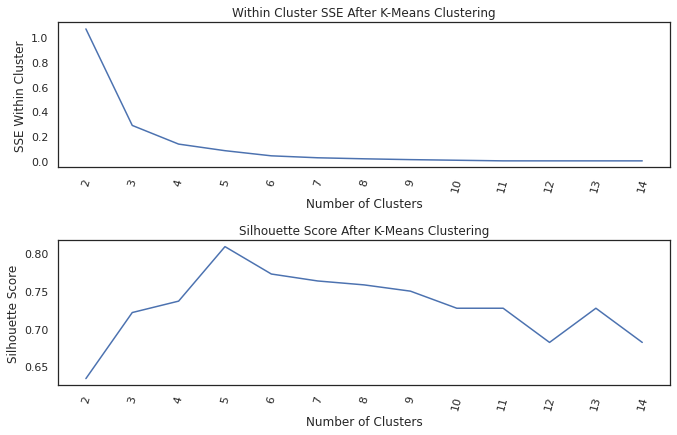

In [122]:
plot_cluster(cluster_food_prod_2, max_loop=15)

In [123]:
cluster_food_prod_2trial = apply_cluster(cluster_food_prod_2, clusters=5)

clustering performance
-----------------------------------
silhouette score: 0.8092024103612409
sse within cluster: 0.08250000000000006


In [124]:
sub_cluster_perf_df = (
    cluster_food_prod_2trial
    .groupby('cluster')
    .agg({"Total_emissions":"mean", "Food product":"count"})
    .sort_values('Total_emissions')
    .reset_index()
)

sub_cluster_perf_df

,cluster,Total_emissions,Food product
0,0,0.325,8
1,3,0.800,4
2,1,1.075,4
3,2,1.400,4
4,4,1.600,2


Since we want the cluster with lowest emission, which is cluster 0, and since it has 8 products, we will perform another round of clustering over it

In [125]:
cluster_food_prod_2trial.query("cluster == 0")

,Food product,Total_emissions,cluster
4,Potatoes,0.3,0
9,Nuts,0.2,0
12,Onions & Leeks,0.3,0
13,Root Vegetables,0.3,0
14,Brassicas,0.4,0
15,Other Vegetables,0.5,0
16,Citrus Fruit,0.3,0
18,Apples,0.3,0


In [126]:
lowest_emsn_food_prod = cluster_food_prod_2trial.query("cluster == 0")

Within cluster sum of square error and Silhoutte score

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



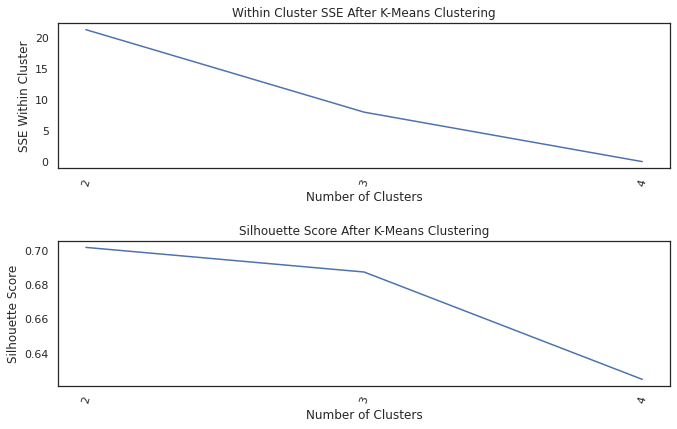

In [127]:
plot_cluster(lowest_emsn_food_prod, max_loop=5)

Third trial of clustering

In [128]:
cluster_food_prod_3trial = apply_cluster(lowest_emsn_food_prod, clusters=3)

clustering performance
-----------------------------------
silhouette score: 0.6875
sse within cluster: 7.999999999999986


<ipython-input-113-125c197b8701>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [129]:
best_sub_cluster_perf = (    
    cluster_food_prod_3trial
    .groupby('cluster')
    .agg({"Total_emissions":"mean", "Food product":"count"})
    .sort_values('Total_emissions')
    .reset_index()
)
best_sub_cluster_perf

,cluster,Total_emissions,Food product
0,0,0.20,1
1,2,0.30,5
2,1,0.45,2


Each of these 3 clusters are the food products with lowest emission, with different levels of emission. We can use apply different strategies to each of these clusters   

Cluster 0 with lowest emission

In [130]:
cluster_food_prod_3trial.query("cluster == 0")

,Food product,Total_emissions,cluster
9,Nuts,0.2,0


Other clusters with low emission

In [131]:
cluster_food_prod_3trial.query("cluster == 2")

,Food product,Total_emissions,cluster
4,Potatoes,0.3,2
12,Onions & Leeks,0.3,2
13,Root Vegetables,0.3,2
16,Citrus Fruit,0.3,2
18,Apples,0.3,2


In [132]:
cluster_food_prod_3trial.query("cluster == 1")

,Food product,Total_emissions,cluster
14,Brassicas,0.4,1
15,Other Vegetables,0.5,1


In [133]:
df_food.head(5)

,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Land use per 1000kcal (m² per 1000kcal),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories),Food product
3,0.470004,1.454270,-0.056060,1.063830,5.214455,8.876559,Oatmeal
4,1.386294,2.252804,0.188362,-0.274922,6.413432,9.506726,Rice
5,-1.203973,1.559007,-0.464554,0.184141,4.391206,8.232857,Potatoes
7,0.955511,1.572880,-0.092465,-0.542666,5.174265,8.451771,Cane Sugar
8,0.336472,0.432633,-0.662289,-0.651300,4.127502,7.902726,Beet Sugar


In [134]:
df_food_fr = df_food[['Food product', 'Total_emissions','Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)','Freshwater withdrawals per 1000kcal (liters per 1000kcal)','Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)','Land use per 1000kcal (m² per 1000kcal)','Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)']]

In [135]:
df_food_fr['sum_emission'] = df_food_fr['Total_emissions'] + df_food_fr['Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)'] + df_food_fr['Freshwater withdrawals per 1000kcal (liters per 1000kcal)'] +df_food_fr['Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)'] + df_food_fr['Land use per 1000kcal (m² per 1000kcal)'] + df_food_fr['Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)']

<ipython-input-135-557b03e74544>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [136]:
df_food_fr['sum_emission'] = df_food_fr['Total_emissions'] + df_food_fr['Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)'] + df_food_fr['Freshwater withdrawals per 1000kcal (liters per 1000kcal)'] +df_food_fr['Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)'] + df_food_fr['Land use per 1000kcal (m² per 1000kcal)'] + df_food_fr['Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)']

<ipython-input-136-557b03e74544>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



###Fractal clustering - objective function - determining the cluster with the highest emission based on an overall sum(total emission + columns not included in total emission), inorder to avoid these food products and decrease their production or find a more environmental-friendly  

In [137]:
df_emission = df_food_fr[['Food product', 'sum_emission']]

In [138]:
def plot_cluster(df, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    
    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    
    sse_within_cluster = {}
    silhouette_score = {}
    
    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
        #, n_jobs=-1)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)


Calculating within sum of square error and Silhoutte score

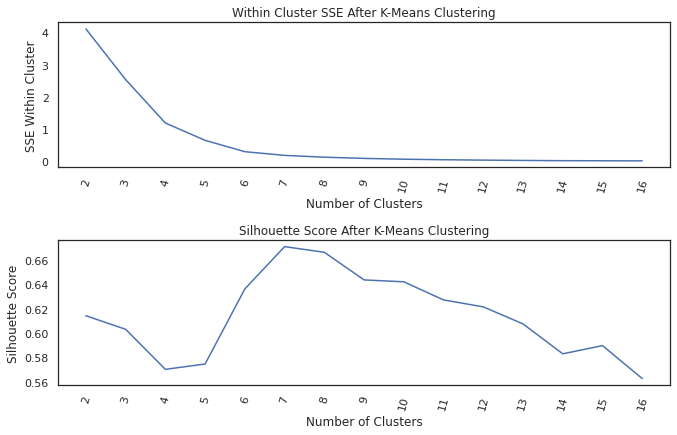

In [139]:
plot_cluster(df_emission, max_loop=17)

In [140]:
def apply_cluster(df, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10) #, n_jobs=-1)  
    kmeans.fit(X_rb) 
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_
    
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score))
    print("sse within cluster: " + str(sse_within_cluster))
    
    return df

First trial of clustering

In [141]:
df_emission_1 = apply_cluster(df_emission, clusters=3)

clustering performance
-----------------------------------
silhouette score: 0.6032598803373993
sse within cluster: 2.5343874799026898


<ipython-input-140-125c197b8701>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [142]:
  cluster_df = (
    df_emission_1
    .groupby('cluster')
    .agg({"sum_emission":"mean", "Food product":"count"})
    .sort_values('sum_emission')
    .reset_index()
)

cluster_df

,cluster,sum_emission,Food product
0,2,1.818885,1
1,0,15.213625,15
2,1,26.157798,14


In [143]:
df_emission_1.query("cluster == 1").sort_values('sum_emission')

,Food product,sum_emission,cluster
32,Dark Chocolate,21.515134,1
28,Berries & Grapes,22.021630,1
23,Brassicas,22.108752,1
40,Eggs,22.294091,1
37,Poultry Meat,23.462293,1
38,Milk,25.623967,1
20,Tomatoes,25.665522,1
31,Coffee,25.906550,1
36,Pig Meat,25.921588,1
41,Fish (farmed),27.768874,1


Creating a cluster with products in cluster 1

In [144]:
df_emission_2 = df_emission_1.query("cluster == 1").reset_index(drop=True)

Calculating within Sum of square error and Silhoutte score

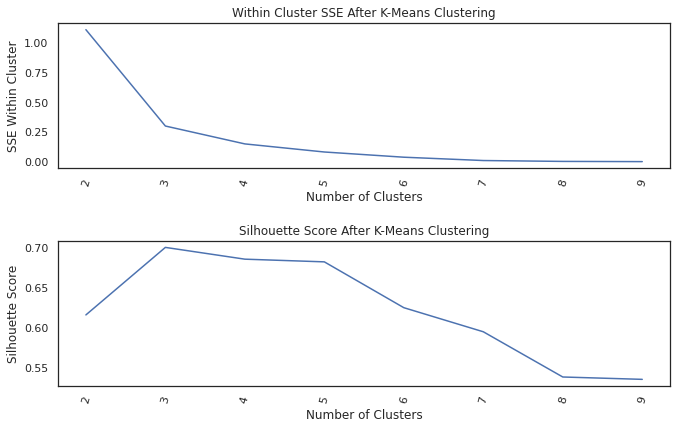

In [145]:
plot_cluster(df_emission_2, max_loop=10)

Performing second trial of clustering

In [146]:
df_emission_2_ = apply_cluster(df_emission_2, clusters=3)

clustering performance
-----------------------------------
silhouette score: 0.7004228385943323
sse within cluster: 0.30171353395248457


In [147]:
sub_cluster_perf_df = (
    df_emission_2_
    .groupby('cluster')
    .agg({"sum_emission":"mean", "Food product":"count"})
    .sort_values('sum_emission')
    .reset_index()
)

sub_cluster_perf_df

,cluster,sum_emission,Food product
0,0,22.280380,5
1,2,26.177300,5
2,1,30.980194,4


Finding cluster which contains food products with highest emission - and develop strategies accordingly to decrease their production, or find a more sustainable way to produce them - with alternate resources 

In [148]:
df_emission_2_.query("cluster == 1")

,Food product,sum_emission,cluster
5,Beef (beef herd),32.897694,1
6,Beef (dairy herd),30.800692,1
7,Lamb & Mutton,30.961060,1
11,Cheese,29.261330,1
